# CLT with dice

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [2]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [3]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) 
    #turn it into integers from 1 to 6:
    return [int(x*6)+1 for x in flatRandom]

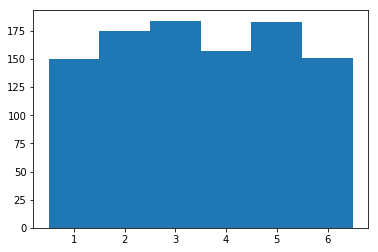

In [4]:
oneDieRandom = throwOneDie(1000)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [5]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [6]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.501 , sigma =  1.6649321307488787


Now let's throw multiple dice

In [7]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        newRandomNumbers = PDF(Nevents)
        randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

Now let's put it all together in one neat function

In [8]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999):
    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)

    mini=histoMin
    maxi=histoMax
    if(histoMax < histoMin):
        mini=NDice-0.5
        maxi=NDice*6+0.5
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi-mini)
    if histoBins > 0 : bins=histoBins

    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram
    plt.show()
    mu, var, sigma = meanAndStdev(RandomDice)
    print("For ", NDice, " dice, thrown ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)

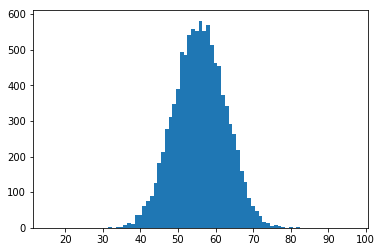

For  16  dice, thrown  10000  times:
mean =  55.8121 , variance =  46.1385935899998 , sigma =  6.792539553804586


In [11]:
doAll(throwOneDie, 16, 10000)

Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected.

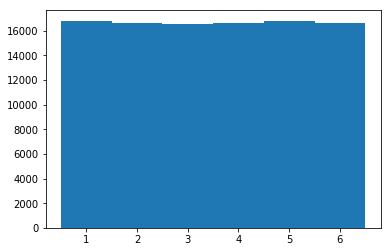

For  1  dice, thrown  100000  times:
mean =  3.49896 , variance =  2.9197389184 , sigma =  1.708724354130882


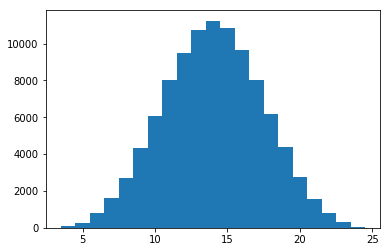

For  4  dice, thrown  100000  times:
mean =  14.01246 , variance =  11.772704748399974 , sigma =  3.431137529799698


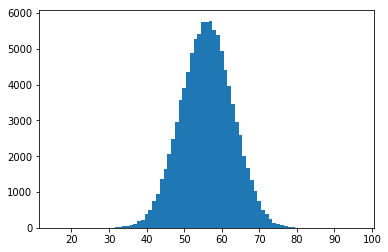

For  16  dice, thrown  100000  times:
mean =  56.01203 , variance =  46.67072527909977 , sigma =  6.831597564193881


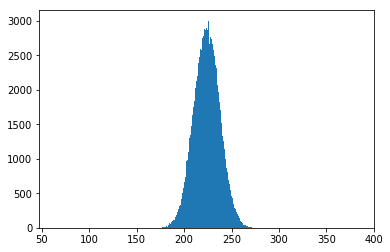

For  64  dice, thrown  100000  times:
mean =  223.94544 , variance =  187.63282320640428 , sigma =  13.697913096760553


In [12]:
doAll(throwOneDie, 1, 100000)
doAll(throwOneDie, 4, 100000)
doAll(throwOneDie, 16, 100000)
doAll(throwOneDie, 64, 100000)

Does it also work with other distributions? Let's try a triangular shaped one

In [13]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften) 
    triangleRandom = [sqrt(x) for x in flat] ## magic coordinate trafo
    #turn it into integers from 1 to 6: (not really needed, but why not)
    return [int(x*6)+1 for x in triangleRandom]

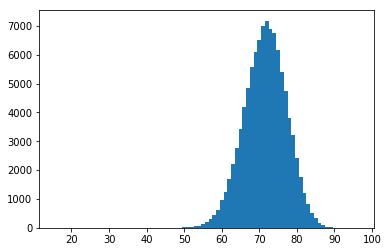

For  16  dice, thrown  100000  times:
mean =  71.54757 , variance =  31.52975709510065 , sigma =  5.615136427113828


In [18]:
doAll(throwTriangle, 16, 100000)

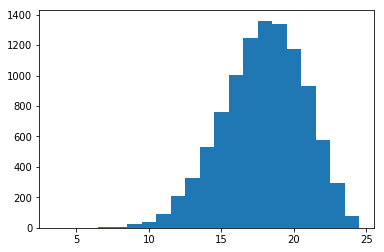

For  4  dice, thrown  10000  times:
mean =  17.8916 , variance =  8.001449439999988 , sigma =  2.828683340354658


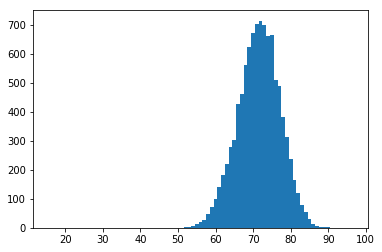

For  16  dice, thrown  10000  times:
mean =  71.5225 , variance =  31.132693750000726 , sigma =  5.579667888862269


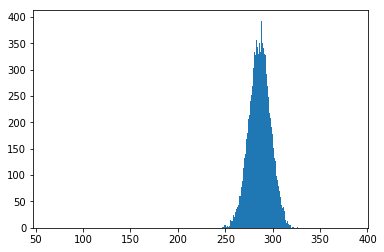

For  64  dice, thrown  10000  times:
mean =  286.4075 , variance =  124.78544374999183 , sigma =  11.170740519320635


In [19]:
doAll(throwTriangle, 4, 10000)
doAll(throwTriangle, 16, 10000)
doAll(throwTriangle, 64, 10000)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential

In [20]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

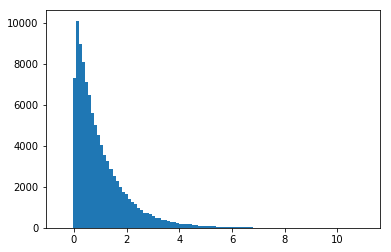

For  1  dice, thrown  100000  times:
mean =  1.0042036318471879 , variance =  1.0049916164006825 , sigma =  1.0024927014201561


In [21]:
doAll(expo, 1, 100000, 100)

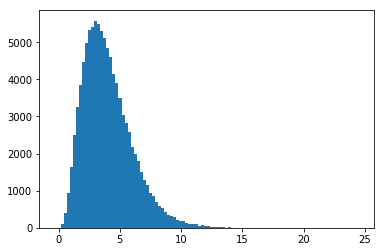

For  4  dice, thrown  100000  times:
mean =  4.001280327170589 , variance =  3.9772274815406092 , sigma =  1.9942987443060303


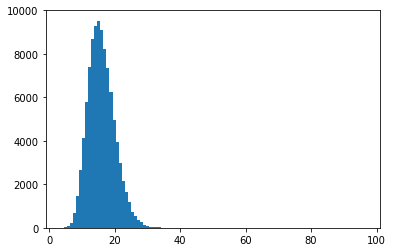

For  16  dice, thrown  100000  times:
mean =  15.996383852081166 , variance =  15.961386249990312 , sigma =  3.9951703655777075


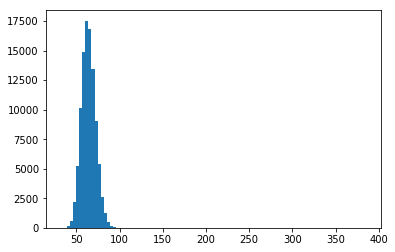

For  64  dice, thrown  100000  times:
mean =  64.0199491950656 , variance =  63.51838179489823 , sigma =  7.96984201818946


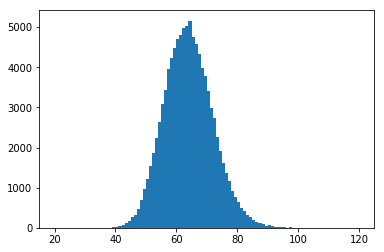

For  64  dice, thrown  100000  times:
mean =  64.02345127428919 , variance =  64.14389427233709 , sigma =  8.00898834262712


In [22]:
doAll(expo, 4, 100000, 100)
doAll(expo, 16, 100000, 100)
doAll(expo, 64, 100000, 100)
doAll(expo, 64, 100000, 100, 20, 120) # zoom in a bit